In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

print('All imports were successful!')

All imports were successful!


In [3]:
df = pd.read_csv(r'D:\SRM\Github codes\Datasets\archive (5)\Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.drop(['id'], axis=1, inplace=True)

In [5]:
def convert_column_to_numeric(df, col):
    # Create a dict
    unique_values = df[col].unique()
    value_to_number = {value: idx + 1 for idx, value in enumerate(unique_values)}

    # Convert column
    df[col] = df[col].map(value_to_number)

    return df, value_to_number

In [6]:
# Convert categorical data
convert_column_to_numeric(df, 'Gender')
convert_column_to_numeric(df, 'Profession')
convert_column_to_numeric(df, 'Dietary Habits')
convert_column_to_numeric(df, 'Degree')
convert_column_to_numeric(df, 'Have you ever had suicidal thoughts ?')
convert_column_to_numeric(df, 'Family History of Mental Illness')
convert_column_to_numeric(df, 'City')

df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,1,1,5.0,0.0,8.97,2.0,0.0,5-6 hours,1,1,1,3.0,1.0,1,1
1,2,24.0,2,1,2.0,0.0,5.90,5.0,0.0,5-6 hours,2,2,2,3.0,2.0,2,0
2,1,31.0,3,1,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,1,3,2,9.0,1.0,2,0
3,2,28.0,4,1,3.0,0.0,5.59,2.0,0.0,7-8 hours,2,4,1,4.0,5.0,2,1
4,2,25.0,5,1,4.0,0.0,8.13,3.0,0.0,5-6 hours,2,5,1,1.0,1.0,1,0


In [7]:
# Convert from string to float
convert = {
    '5-6 hours': 5.5,
    'Less than 5 hours': 4.5,
    '7-8 hours': 7.8,
    'More than 8 hours': 8.5,
    'Others': 0
}

df['Sleep Duration'] = df['Sleep Duration'].map(convert)
df['Sleep Duration'] = df['Sleep Duration'].astype(float)
df['Sleep Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27901 entries, 0 to 27900
Series name: Sleep Duration
Non-Null Count  Dtype  
--------------  -----  
27901 non-null  float64
dtypes: float64(1)
memory usage: 218.1 KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  int64  
 3   Profession                             27901 non-null  int64  
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  float64
 10  Dietary Habits                         27901 non-null  int64  
 11  De

In [9]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
df = df.dropna()
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [12]:
# Create parameters
params = {'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': [None, 5, 10, 15, 20],
          'min_samples_split': [2, 4, 5, 7, 9],
          'min_samples_leaf': [1, 2, 4, 5, 6]}

# Train a GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5).fit(X_train, y_train)

# Train Decision Tree classifier
dtc = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = dtc.predict(X_test)

# Evaluate its performance
dtc_accuracy = accuracy_score(y_test, y_hat)
dtc_recall = recall_score(y_test, y_hat, average='weighted')
dtc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {dtc_accuracy}
Recall Score: {dtc_recall}
F1 Score: {dtc_f1}''')


Accuracy Score: 0.8245519713261649
Recall Score: 0.8245519713261649
F1 Score: 0.8250522601063395


In [13]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = rfc.predict(X_test)

# Evaluate its performance
rfc_accuracy = accuracy_score(y_test, y_hat)
rfc_recall = recall_score(y_test, y_hat, average='weighted')
rfc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {rfc_accuracy}
Recall Score: {rfc_recall}
F1 Score: {rfc_f1}''')

Accuracy Score: 0.8370967741935483
Recall Score: 0.8370967741935483
F1 Score: 0.8358834566806286


In [14]:
# Train an Extra Trees Classifier and make predictions
etc = ExtraTreesClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = etc.predict(X_test)

# Evaluate the performance
etc_accuracy = accuracy_score(y_test, y_hat)
etc_recall = recall_score(y_test, y_hat, average='weighted')
etc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {etc_accuracy}
Recall Score: {etc_recall}
F1 Score: {etc_f1}''')

Accuracy Score: 0.8206093189964158
Recall Score: 0.8206093189964158
F1 Score: 0.8185481092241382


In [16]:
# Create parameters and train a GridSearchCV
params = {
    'num_leaves': [7, 15, 31],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, -1],
    'min_child_samples': [10, 20, 30]
}

grid = GridSearchCV(lgb.LGBMClassifier(verbose=-1), params, cv=5).fit(X_train, y_train)

# Train a LightGBM and make predictions
lgb_model = lgb.LGBMClassifier(**grid.best_params_, verbose=-1).fit(X_train, y_train)
y_hat = lgb_model.predict(X_test)

# Evaluate the performance
lgb_accuracy = accuracy_score(y_test, y_hat)
lgb_recall = recall_score(y_test, y_hat, average='weighted')
lgb_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {lgb_accuracy}
Recall Score: {lgb_recall}
F1 Score: {lgb_f1}''')

Accuracy Score: 0.8492831541218638
Recall Score: 0.8492831541218638
F1 Score: 0.8489052656301938


In [17]:
# Create parameters and train a GridSearchCV
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier()), params, cv=5).fit(X_train, y_train)

# Train an AdaBoost Classifier and make predictions
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(), **grid.best_params_).fit(X_train, y_train)
y_hat = abc.predict(X_test)

# Evaluate the performance
abc_accuracy = accuracy_score(y_test, y_hat)
abc_recall = recall_score(y_test, y_hat, average='weighted')
abc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {abc_accuracy}
Recall Score: {abc_recall}
F1 Score: {abc_f1}''')

Accuracy Score: 0.7664874551971326
Recall Score: 0.7664874551971326
F1 Score: 0.7667555113140975


In [18]:
# Create scores dictionary
scores = {'Decision Tree': [dtc_accuracy, dtc_recall, dtc_f1],
          'Extra Randomized Trees': [etc_accuracy, etc_recall, etc_f1],
          'Random Forest': [rfc_accuracy, rfc_recall, rfc_f1],
          'LightGBM': [lgb_accuracy, lgb_recall, lgb_f1],
          'AdaBoost': [abc_accuracy, abc_recall, abc_f1]
}

# Create the data frame and show it
scores_table = pd.DataFrame(scores)
scores_table.index = ['Accuracy', 'Recall', 'F1']
scores_table.head()

,Decision Tree,Extra Randomized Trees,Random Forest,LightGBM,AdaBoost
Accuracy,0.824552,0.820609,0.837097,0.849283,0.766487
Recall,0.824552,0.820609,0.837097,0.849283,0.766487
F1,0.825052,0.818548,0.835883,0.848905,0.766756


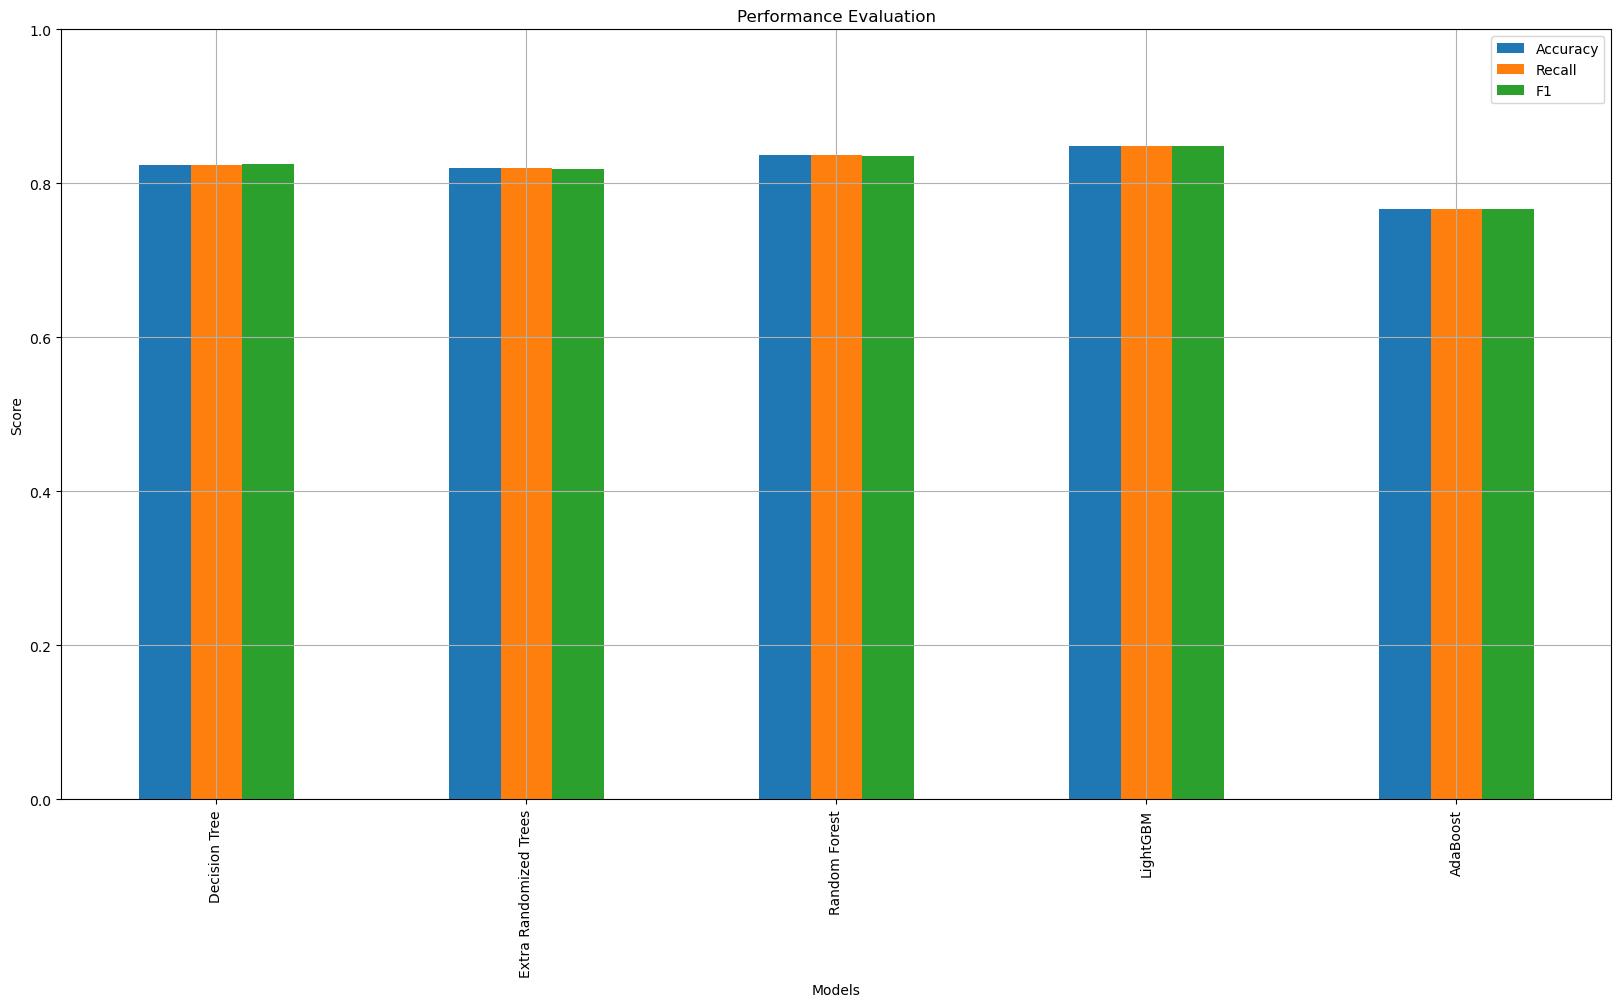

In [19]:
# Create and show the graph
scores_table.T.plot(kind='bar', figsize=(20, 10))
plt.title('Performance Evaluation')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.grid()
plt.show()
